<a href="https://colab.research.google.com/github/eleco/machine_learning_siraj/blob/master/project3/fraud_detection_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

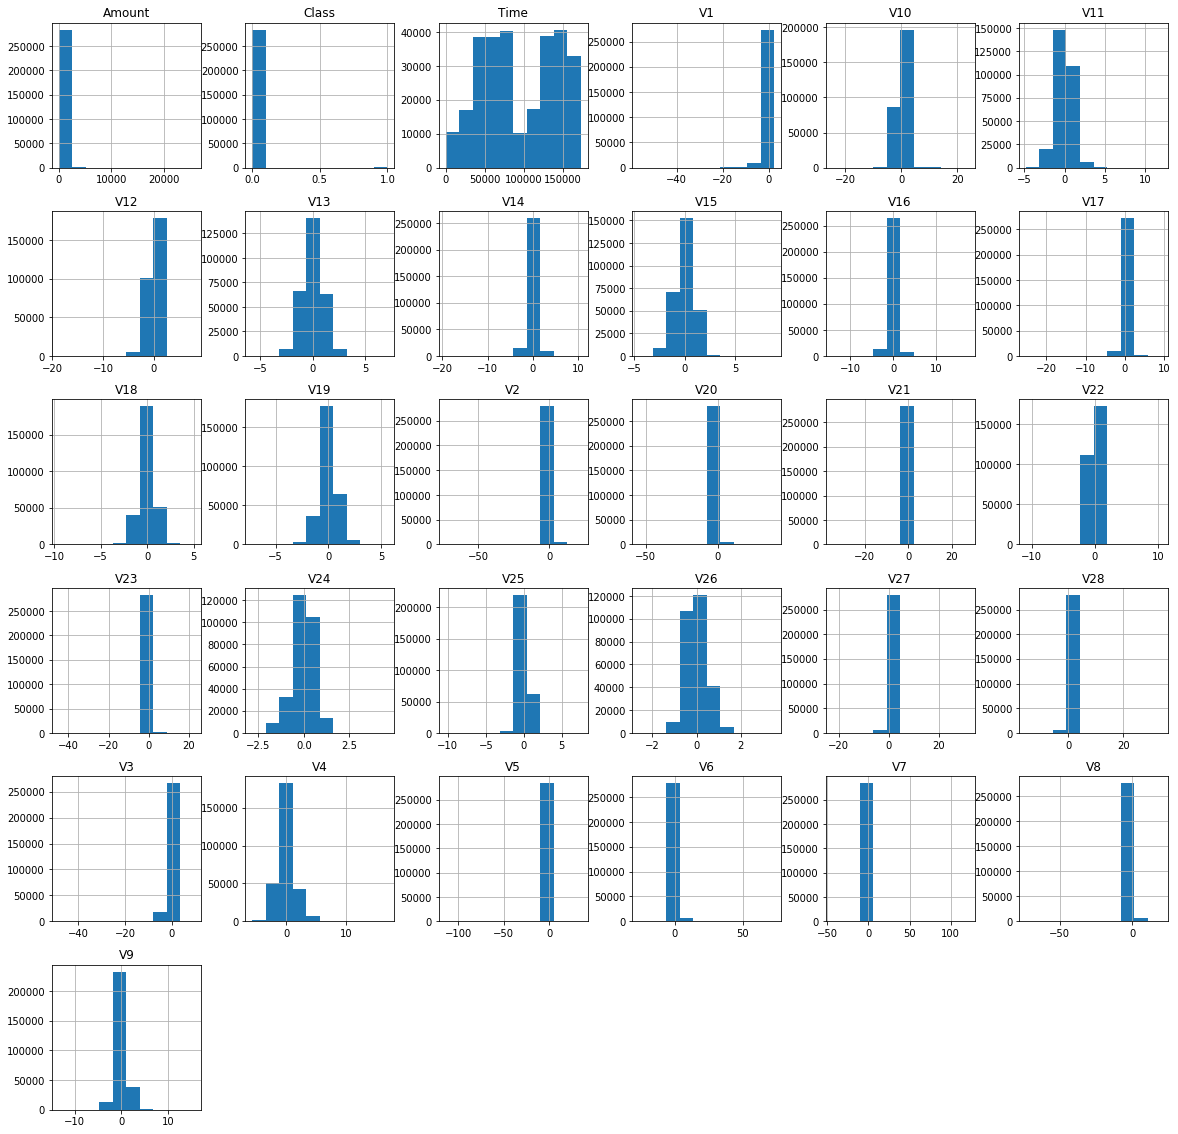

fraud cases-----------------------
492
            Time         V1         V2  ...       V28  Amount  Class
283415   35771.0  -3.218952   2.708535  ... -0.745295   60.60      1
283607  148053.0   1.261324   2.726800  ...  0.280486    1.59      1
284285   27252.0 -25.942434  14.601998  ...  0.406810   99.99      1
284344   41607.0 -18.247513   8.713250  ... -1.022147   53.95      1
284778   53727.0  -1.649279   1.263974  ...  0.112146  112.45      1

[5 rows x 31 columns]
non fraud cases--------------------
284315
            Time         V1         V2  ...       V28  Amount  Class
283415   35771.0  -3.218952   2.708535  ... -0.745295   60.60      1
283607  148053.0   1.261324   2.726800  ...  0.280486    1.59      1
284285   27252.0 -25.942434  14.601998  ...  0.406810   99.99      1
284344   41607.0 -18.247513   8.713250  ... -1.022147   53.95      1
284778   53727.0  -1.649279   1.263974  ...  0.112146  112.45      1

[5 rows x 31 columns]


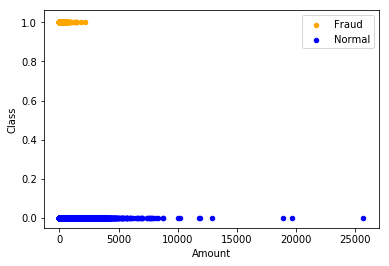

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


decision:  [-11.60224729 -16.33294848 -12.96569359 ... -13.45696595 -12.06837429
  -4.66268642]
coef:  [[-9.04170665e-05  1.70180697e-01 -3.45723466e-01 -7.79999758e-01
   1.64380448e-01 -2.79095112e-03 -7.21091789e-02  6.01050273e-02
  -1.36895469e-01 -3.88197278e-01 -2.10223124e-01 -1.34218762e-01
  -3.07160076e-02 -2.70130949e-01 -7.20499461e-01 -1.95730313e-01
  -2.52463559e-01 -4.37859756e-01 -1.64531732e-02  4.15311287e-02
   3.31530359e-02  1.32329812e-01  1.85215518e-01  1.75952178e-02
  -2.55923136e-02 -1.63111130e-01  2.51441590e-02 -4.07899415e-02
   2.46161135e-02 -6.85192549e-03]]
Score:  0.9990449706468919
{'C': 100000.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[9.48342732e-08 3.10689811e-03 1.78296324e-07 ... 4.94477471e-06
 2.62585318e-03 4.08073005

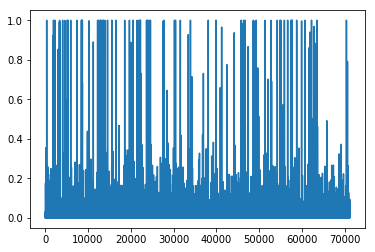

In [0]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import random

df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df = df[np.isfinite(df).all(1)] 

df.info()

print(df.tail(10))


df.hist(figsize = (20, 20))
plt.show()

fraud = df.loc[df['Class'] == 1]
non_fraud = df.loc[df['Class'] == 0]

print('fraud cases-----------------------')
print(len(fraud))
print(fraud.tail())

print('non fraud cases--------------------')
print(len(non_fraud))
print(fraud.tail())

ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_fraud.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

# time for machine learning

x = df.iloc[:,:-1]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print ("decision: ",logistic.decision_function(X_train))
print("coef: ", logistic.coef_) 



np.hstack((logistic.intercept_[:,None], logistic.coef_))


#print('Selected features: %s' % list(X_train.columns[logistic.support_]))
print('Score: ', logistic.score(X_test, y_test))
#print(logistic.get_support())
print(logistic.get_params())
#y_predicted = np.array(logistic.predict(X_test))
y_predicted = logistic.predict_proba(X_test)[:,1]

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#print("Classification report-----------------")
#print(classification_report(y_test, y_predicted))
#print("Confusion matrix----------------------")
#print(confusion_matrix(y_test, y_predicted))
#print("Accuracy score-----------------------")
#print(accuracy_score(y_test, y_predicted))
print(y_predicted)
plt.plot(y_predicted)
plt.show()